In [1]:
import numpy as np
import scipy.sparse as sps
import porepy as pp

In [2]:
import sys
sys.path.append("./class")
from Transport_class import Transport
from Reaction_class import Reaction

/home/dell/anaconda3/lib/python3.8/site-packages/porepy/viz/plot_grid.py:241: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  ax.set_zlim3d(z)


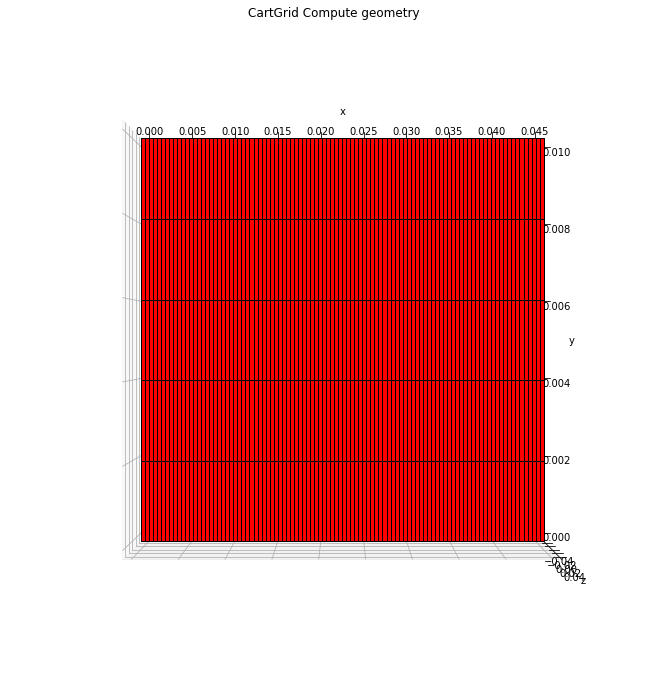

In [3]:
Nx=100
Ny=5
Lx=0.045
Ly=0.01
hx=Lx/Nx
hy=Ly/Ny
phys_dims=[Lx,Ly]
g=pp.CartGrid([Nx,Ny],phys_dims)
g.compute_geometry()  
pp.plot_grid(g, figsize=(15,12))

In [4]:
unity = np.ones(g.num_cells)
empty = np.empty(0)
porosity=unity
aperture=1

In [5]:
bc_type_Ca=["dir","dir"]
bc_value_Ca=[0.,0.]
#init_cond_Ca=lambda x,y,z:int(x<0.5)
init_cond_Ca=lambda x,y,z:0.0

In [6]:
bc_type_CaSiO3=["dir","dir"]
bc_value_CaSiO3=[0.,0.]
#init_cond_CaSiO3=lambda x,y,z:int(x<0.5)
init_cond_CaSiO3=lambda x,y,z:16.7504

In [7]:
reaction_data={"temperature":423,
       "A":1.9e-2,
       #"rate_const":0.004466,
       "rate_const":0.0005,
       #"rate_const":0.0,
       "E":4700,
       "R":8.314,
       "K_eq":10e9,
       "ph":3.5,
       "mass_weight":0.3*1.0}

In [8]:
reaction=Reaction(g,reaction_data)
reaction.set_const_rate()
print(reaction.const_rate)

2.4964205820053154e-06


In [9]:
data_reagent_Ca = {"bc_type": bc_type_Ca,
            "bc_value": bc_value_Ca,
            "time_step": 34.56,
            "mass_weight": 0.3*porosity * aperture,
            "darcy_flux":np.zeros(g.num_faces),
            "t_max": 345600,
            "method": "Implicit",
            "lambda_lin_decay":0,
            "initial_cond":init_cond_Ca}

In [10]:
data_reagent_CaSiO3= {"bc_type": bc_type_CaSiO3,
            "bc_value": bc_value_CaSiO3,
            "time_step": 34.56,
            "mass_weight": 0.3*porosity * aperture,
            "darcy_flux":np.zeros(g.num_faces),
            "t_max": 345600,
            "method": "Implicit",
            "lambda_lin_decay":0,
            "initial_cond":init_cond_CaSiO3}

In [11]:
data_reagent_Ca["darcy_flux"][:(Nx+1)*Ny]=hy*6.67e-8

In [12]:
print(data_reagent_CaSiO3["darcy_flux"])

[0. 0. 0. ... 0. 0. 0.]


In [13]:
print(data_reagent_Ca["darcy_flux"])

[1.334e-10 1.334e-10 1.334e-10 ... 0.000e+00 0.000e+00 0.000e+00]


In [14]:
Ca=np.zeros(g.num_cells)
Ca_transport=Transport(g,data_reagent_Ca)
Ca_lhs,Ca_rhs_b,Ca_rhs_matrix=Ca_transport.set_and_get_matrices(Ca)

In [15]:
print(Ca_lhs)

  (0, 0)	7.945899999999998e-09
  (1, 0)	-1.334e-10
  (1, 1)	7.945899999999998e-09
  (2, 1)	-1.334e-10
  (2, 2)	7.945900000000002e-09
  (3, 2)	-1.334e-10
  (3, 3)	7.945899999999997e-09
  (4, 3)	-1.334e-10
  (4, 4)	7.945899999999997e-09
  (5, 4)	-1.334e-10
  (5, 5)	7.945900000000007e-09
  (6, 5)	-1.334e-10
  (6, 6)	7.945899999999997e-09
  (7, 6)	-1.334e-10
  (7, 7)	7.945899999999997e-09
  (8, 7)	-1.334e-10
  (8, 8)	7.945899999999997e-09
  (9, 8)	-1.334e-10
  (9, 9)	7.945899999999998e-09
  (10, 9)	-1.334e-10
  (10, 10)	7.945899999999998e-09
  (11, 10)	-1.334e-10
  (11, 11)	7.945900000000012e-09
  (12, 11)	-1.334e-10
  (12, 12)	7.945899999999998e-09
  :	:
  (487, 487)	7.945899999999983e-09
  (488, 487)	-1.334e-10
  (488, 488)	7.945900000000103e-09
  (489, 488)	-1.334e-10
  (489, 489)	7.945899999999983e-09
  (490, 489)	-1.334e-10
  (490, 490)	7.945899999999983e-09
  (491, 490)	-1.334e-10
  (491, 491)	7.945899999999983e-09
  (492, 491)	-1.334e-10
  (492, 492)	7.945899999999983e-09
  (493, 49

In [16]:
print("Ca_lhs")
print(Ca_lhs)
print("Ca_rhs_b")
print(Ca_rhs_b)
print("Ca_rhs_matrix")
print(Ca_rhs_matrix)

Ca_lhs
  (0, 0)	7.945899999999998e-09
  (1, 0)	-1.334e-10
  (1, 1)	7.945899999999998e-09
  (2, 1)	-1.334e-10
  (2, 2)	7.945900000000002e-09
  (3, 2)	-1.334e-10
  (3, 3)	7.945899999999997e-09
  (4, 3)	-1.334e-10
  (4, 4)	7.945899999999997e-09
  (5, 4)	-1.334e-10
  (5, 5)	7.945900000000007e-09
  (6, 5)	-1.334e-10
  (6, 6)	7.945899999999997e-09
  (7, 6)	-1.334e-10
  (7, 7)	7.945899999999997e-09
  (8, 7)	-1.334e-10
  (8, 8)	7.945899999999997e-09
  (9, 8)	-1.334e-10
  (9, 9)	7.945899999999998e-09
  (10, 9)	-1.334e-10
  (10, 10)	7.945899999999998e-09
  (11, 10)	-1.334e-10
  (11, 11)	7.945900000000012e-09
  (12, 11)	-1.334e-10
  (12, 12)	7.945899999999998e-09
  :	:
  (487, 487)	7.945899999999983e-09
  (488, 487)	-1.334e-10
  (488, 488)	7.945900000000103e-09
  (489, 488)	-1.334e-10
  (489, 489)	7.945899999999983e-09
  (490, 489)	-1.334e-10
  (490, 490)	7.945899999999983e-09
  (491, 490)	-1.334e-10
  (491, 491)	7.945899999999983e-09
  (492, 491)	-1.334e-10
  (492, 492)	7.945899999999983e-09
  (

In [17]:
CaSiO3=np.zeros(g.num_cells)
CaSiO3_transport=Transport(g,data_reagent_CaSiO3)
CaSiO3_lhs,CaSiO3_rhs_b,CaSiO3_rhs_matrix=CaSiO3_transport.set_and_get_matrices(CaSiO3)

In [18]:
print("CaSiO3_lhs")
print(CaSiO3_lhs)
print("CaSiO3_rhs_b")
print(CaSiO3_rhs_b)
print("CaSiO3_rhs_matrix")
print(CaSiO3_rhs_matrix)

CaSiO3_lhs
  (0, 0)	7.812499999999998e-09
  (1, 1)	7.812499999999998e-09
  (2, 2)	7.812500000000001e-09
  (3, 3)	7.812499999999996e-09
  (4, 4)	7.812499999999996e-09
  (5, 5)	7.812500000000006e-09
  (6, 6)	7.812499999999996e-09
  (7, 7)	7.812499999999996e-09
  (8, 8)	7.812499999999996e-09
  (9, 9)	7.812499999999998e-09
  (10, 10)	7.812499999999998e-09
  (11, 11)	7.812500000000011e-09
  (12, 12)	7.812499999999998e-09
  (13, 13)	7.812499999999998e-09
  (14, 14)	7.812499999999998e-09
  (15, 15)	7.812499999999998e-09
  (16, 16)	7.812499999999998e-09
  (17, 17)	7.812499999999998e-09
  (18, 18)	7.812500000000011e-09
  (19, 19)	7.812499999999983e-09
  (20, 20)	7.812500000000011e-09
  (21, 21)	7.812499999999983e-09
  (22, 22)	7.812500000000011e-09
  (23, 23)	7.812500000000011e-09
  (24, 24)	7.812499999999983e-09
  :	:
  (475, 475)	7.812499999999983e-09
  (476, 476)	7.812499999999983e-09
  (477, 477)	7.812499999999983e-09
  (478, 478)	7.812499999999983e-09
  (479, 479)	7.812499999999983e-09
  (

In [19]:
Ca_IEsolver = sps.linalg.factorized(Ca_lhs)
CaSiO3_IEsolver = sps.linalg.factorized(CaSiO3_lhs)

/home/dell/.local/lib/python3.8/site-packages/scipy/sparse/linalg/dsolve/linsolve.py:318: SparseEfficiencyWarning: splu requires CSC matrix format
  warn('splu requires CSC matrix format', SparseEfficiencyWarning)


In [20]:
data_transport=Ca_transport.data[pp.PARAMETERS]["transport"]
n_steps = int(np.round(data_transport["t_max"] / data_transport["time_step"]))
dt=data_transport["time_step"]

save_every=100
exporter = pp.Exporter(g, file_name="2_reagents",folder_name="2_reagent_solution")
print(dt)

34.56


In [21]:
for i in range(1,n_steps+1,1):
#for i in range(3):
    #print("Ca=")
    #print(Ca)
    #print("CaSiO3=")
    #print(CaSiO3)
    rhs_react=reaction.compute_rd(Ca)
    #print("rd=")
    #print(rhs_react)
    if np.isclose((i-1) % save_every, 0):
        # Export existing solution (final export is taken care of below)
        exporter.write_vtu({"Ca":Ca, "CaSiO3":CaSiO3}, time_step=int((i-1) // save_every))
        #exporter.write_vtu({"CaSiO3":CaSiO3},time_step=int(i//save_every))
        #print("Ca")
        #print(Ca)
        #print("CaSiO3")
        #print(CaSiO3)
        #print("rhs_react")
        #print(rhs_react*CaSiO3)
    if Ca_transport.data[pp.PARAMETERS]["transport"]["method"]=="Explicit":
        Ca = Ca_IEsolver((Ca_rhs_matrix)*Ca+Ca_rhs_b+rhs_react*CaSiO3)
        CaSiO3=CaSiO3_IEsolver((CaSiO3_rhs_matrix)*CaSiO3+CaSiO3_rhs_b-rhs_react*CaSiO3)
    else:
        Ca = Ca_IEsolver((Ca_rhs_matrix)*Ca +Ca_rhs_b+rhs_react*CaSiO3)
        CaSiO3=CaSiO3_IEsolver((CaSiO3_rhs_matrix)*CaSiO3+CaSiO3_rhs_b-rhs_react*CaSiO3)
    
    
#print(1/dt*A_mass-A_upwind)
print("Ca=")
print(Ca)
print("CaSiO3=")
print(CaSiO3)

exporter.write_vtu({"Ca":Ca, "CaSiO3":CaSiO3}, time_step=(n_steps // save_every))
                         
time_steps = np.arange(
    0, Ca_transport.data[pp.PARAMETERS]["transport"]["t_max"] + dt, save_every * dt
)
print(time_steps.size)
exporter.write_pvd(time_steps)

Ca=
[0.01617311 0.03262522 0.04936233 0.06639051 0.08371593 0.10134482
 0.11928351 0.13753843 0.15611607 0.17502304 0.19426603 0.21385184
 0.23378733 0.25407952 0.27473547 0.29576239 0.31716757 0.33895841
 0.36114244 0.38372727 0.40672066 0.43013044 0.4539646  0.47823123
 0.50293854 0.52809487 0.55370869 0.57978858 0.60634328 0.63338163
 0.66091262 0.68894538 0.71748918 0.74655341 0.77614762 0.80628151
 0.83696491 0.86820781 0.90002035 0.93241281 0.96539565 0.99897948
 1.03317504 1.06799326 1.10344524 1.13954222 1.17629561 1.21371701
 1.25181817 1.29061103 1.33010768 1.37032039 1.41126164 1.45294405
 1.49538043 1.53858378 1.58256728 1.62734429 1.67292836 1.71933322
 1.76657279 1.81466118 1.86361268 1.91344178 1.96416316 2.01579168
 2.06834238 2.12183052 2.17627152 2.231681   2.28807478 2.34546883
 2.40387935 2.4633227  2.52381541 2.58537421 2.64801602 2.71175789
 2.77661708 2.84261101 2.90975726 2.97807357 3.04757784 3.11828811
 3.19022258 3.26339958 3.33783757 3.41355514 3.490571   3.